In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

%matplotlib inline

In [ ]:
df=pd.read_csv('../data/BostonHousing.csv')
print(" First 5 rows of the dataset:")
df.head()

 First 5 rows of the dataset:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


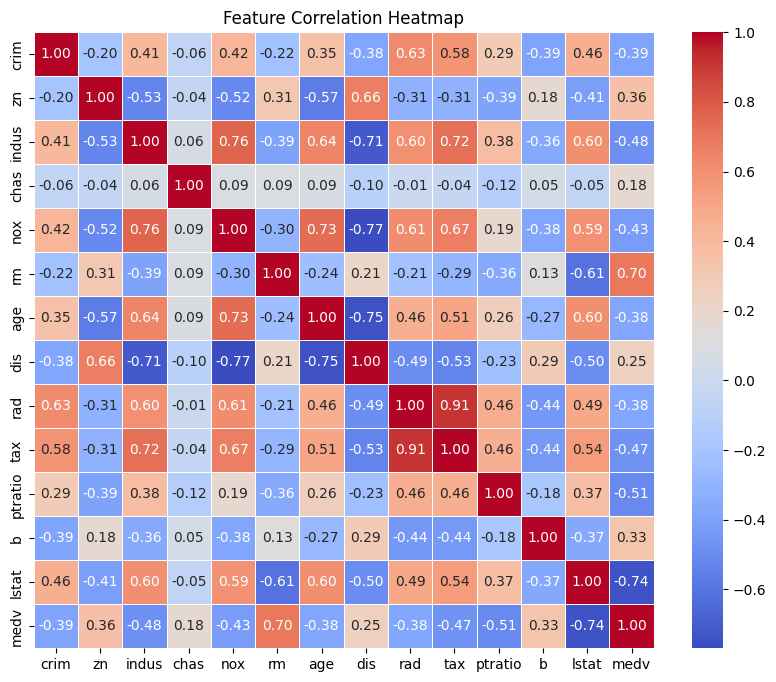

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
df.rename(columns={"medv": "price"}, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.006300,2.944439,2.31,0,0.538,6.575,65.2,1.627278,1,296,15.3,396.90,1.788421,24.0
1,0.026944,0.000000,7.07,0,0.469,6.421,78.9,1.786261,2,242,17.8,396.90,2.316488,21.6
2,0.026924,0.000000,7.07,0,0.469,7.185,61.1,1.786261,2,242,17.8,392.83,1.615420,34.7
3,0.031857,0.000000,2.18,0,0.458,6.998,45.8,1.954757,3,222,18.7,394.63,1.371181,33.4
4,0.066770,0.000000,2.18,0,0.458,7.147,54.2,1.954757,3,222,18.7,396.90,1.845300,36.2


In [8]:
for col in ['crim', 'zn', 'dis', 'lstat', 'price']:
    df[col] = np.log1p(df[col])

from scipy.stats.mstats import winsorize

df['rm'] = winsorize(df['rm'], limits=[0.01, 0.01])  # Cap top & bottom 1%
df['ptratio'] = winsorize(df['ptratio'], limits=[0.05, 0.05])  # Cap top & bottom 5%
df['b'] = winsorize(df['b'], limits=[0.05, 0.05])  # Cap extreme values

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



In [9]:
# Selecting numerical features for normalization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

print("\n Standardizing numerical features...")
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


 Standardizing numerical features...


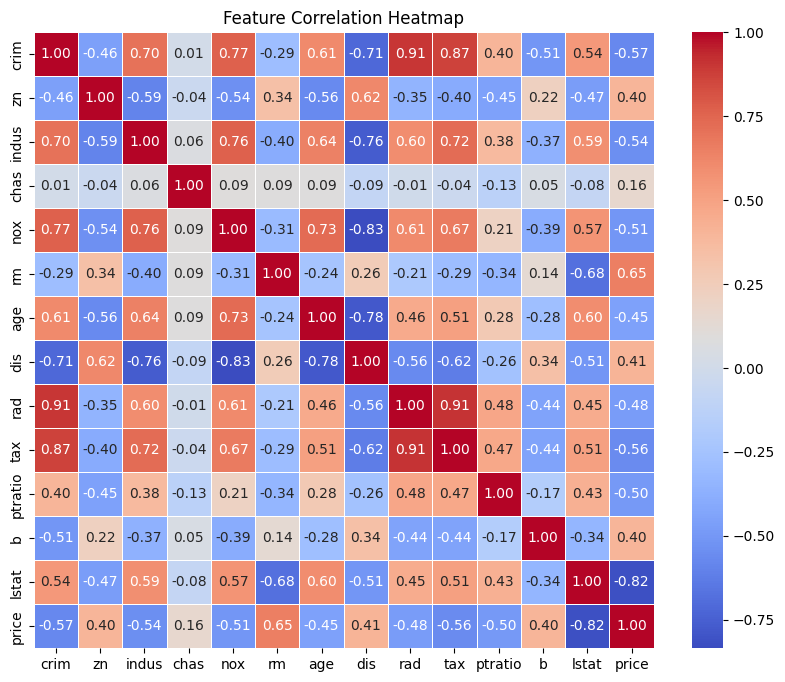

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:


# -------------------- Choose Appropriate Features --------------------

# Select highly correlated features based on the EDA
X = df.drop(['price'], axis=1)
y = df["price"]

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(" Training and Testing Data Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



 Training and Testing Data Shapes:
X_train: (404, 13)
X_test: (102, 13)
y_train: (404,)
y_test: (102,)


In [13]:
# -------------------- Train Linear Regression Model --------------------

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "linear_regression_model.pkl")

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model saved as linear_regression_model.pkl")
print("\n Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model saved as linear_regression_model.pkl

 Model Evaluation:
Mean Squared Error (MSE): 0.24
R-squared (R²): 0.74


### Linear Regression has no major hyperparameters to tune, but we can use Cross-Validation to check model performance.


 Cross-Validation Scores: [0.63917194 0.74904455 0.56201302 0.40667873 0.29591614]
Mean CV R²: 0.53


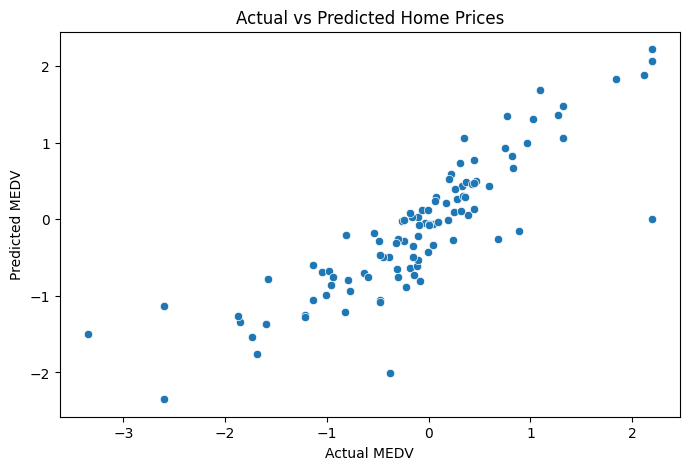

In [15]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("\n Cross-Validation Scores:", cv_scores)
print(f"Mean CV R²: {cv_scores.mean():.2f}")

# -------------------- Plot Results --------------------

# Plot Actual vs Predicted Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Home Prices")
plt.show()